# <u>Machine Learning</u>
* In this part we will try to solve a regression problem: Predict virus's risk score based on his risk factor parameters.
  We will use supervised machine learning algorithm, train and test it on our dataset, and finally we will evaluate the results.

In [1]:
# ~~~ Imports ~~~
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

#and visualization setup
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import seaborn as sns
from collections import Counter

In [2]:
# ~~~ Load csv function ~~~
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df.drop(columns = 'Unnamed: 0').copy()

In [3]:
# ~~~ Load data frames from csv files ~~~
df = load_csv('Virus Full DataFrame.csv')
df_numerical = load_csv('Virus Full DataFrame Numerical.csv')

In [4]:
df_numerical

,virus name,species,genus,family,Host plasticity No of species,Host plasticity No of species Impact,Host plasticity No of orders,Host plasticity No of orders Impact,Geography of the host,Geography of the host Impact,...,Proportion of known human pathogens in the viral family Impact,Transmission mode of the virus,Transmission mode of the virus Impact,Animal to human transmission,Animal to human transmission Impact,Human to human transmission,Human to human transmission Impact,Duration of virus species infection in humans,Duration of virus species infection in humans Impact,Risk Score
0,LASSA VIRUS,Lassa mammarenavirus,Mammarenavirus,Arenaviridae,3,3,1,3,4,3,...,3,1,3,5,3,5,3,3,2,91
1,HEPATITIS E VIRUS,Orthohepevirus A,Orthohepevirus,Hepeviridae,5,3,4,3,5,3,...,3,1,3,5,3,5,3,3,2,86
2,EBOLA VIRUS,Zaire ebolavirus,Ebolavirus,Filoviridae,4,3,3,3,5,3,...,3,2,3,5,3,5,3,3,2,87
3,MARBURG VIRUS,Marburg marburgvirus,Marburgvirus,Filoviridae,4,3,1,3,4,3,...,3,2,3,5,3,1,3,3,2,86
4,NIPAH VIRUS,Nipah virus,Henipavirus,Paramyxoviridae,4,3,1,3,4,3,...,3,1,3,5,3,5,3,3,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,PARAMYXOVIRUS PREDICT PMV-132,Paramyxovirus PREDICT PMV-132,Unassigned,Paramyxoviridae,1,3,1,3,4,3,...,3,3,3,1,3,1,3,1,2,42
883,POLYOMAOVIRUS PREDICT PYV-18,Polyomaovirus PREDICT PyV-18,Unassigned,Polyomaviridae,1,3,1,3,4,3,...,3,3,3,1,3,1,3,1,2,45
884,BAT ASTROVIRUS AFCD88,Bat astrovirus AFCD88,Mamastrovirus,Astroviridae,1,3,1,3,4,3,...,3,1,3,1,3,1,3,1,2,42
885,CORONAVIRUS PREDICT COV-96,Coronavirus PREDICT CoV-96,Betacoronavirus,Coronaviridae,1,3,1,3,3,3,...,3,3,3,1,3,1,3,1,2,41


In [5]:
# ~~~ Create a new dataframe excluding 'virus name', 'species', 'genus' and 'family' columns ~~~

df_ml = df_numerical.drop(df.iloc[:, 0:4], axis = 1) 
df_ml

,Host plasticity No of species,Host plasticity No of species Impact,Host plasticity No of orders,Host plasticity No of orders Impact,Geography of the host,Geography of the host Impact,Number of primary high risk disease transmission interfaces where the virus has been detected,Number of primary high risk disease transmission interfaces where the virus has been detected Impact,Frequency of interaction between domestic animals and humans in the host ecosystem,Frequency of interaction between domestic animals and humans in the host ecosystem Impact,...,Proportion of known human pathogens in the viral family Impact,Transmission mode of the virus,Transmission mode of the virus Impact,Animal to human transmission,Animal to human transmission Impact,Human to human transmission,Human to human transmission Impact,Duration of virus species infection in humans,Duration of virus species infection in humans Impact,Risk Score
0,3,3,1,3,4,3,1,3,5,3,...,3,1,3,5,3,5,3,3,2,91
1,5,3,4,3,5,3,1,3,1,3,...,3,1,3,5,3,5,3,3,2,86
2,4,3,3,3,5,3,3,3,3,3,...,3,2,3,5,3,5,3,3,2,87
3,4,3,1,3,4,3,1,3,5,3,...,3,2,3,5,3,1,3,3,2,86
4,4,3,1,3,4,3,1,3,3,3,...,3,1,3,5,3,5,3,3,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,1,3,1,3,4,3,1,3,1,3,...,3,3,3,1,3,1,3,1,2,42
883,1,3,1,3,4,3,3,3,3,3,...,3,3,3,1,3,1,3,1,2,45
884,1,3,1,3,4,3,1,3,1,3,...,3,1,3,1,3,1,3,1,2,42
885,1,3,1,3,3,3,1,3,1,3,...,3,3,3,1,3,1,3,1,2,41


In [6]:
# ~~~ Define 2 new functions: 1) split the dataset, 2) Create a trained model a new dataframe excluding 'virus name', 'species', 'genus' and 'family' columns ~~~

def spilt_dataset(df, target_column):
    X = df.drop(target_column, axis = 1)
    y = df[target_column]
    return X, y


def train_model(X_train, y_train):
    trained_model = LinearRegression()
    trained_model.fit(X_train, y_train)   
    return trained_model

In [7]:
X, y = spilt_dataset(df_ml, 'Risk Score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #887
Number of training samples: #709
Number of test samples: #178


In [8]:
trained_model = train_model(X_train, y_train)

In [9]:
y_pred = trained_model.predict(X_test)

In [10]:
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

resDF["Deviation"]=abs(resDF["Actual"] - resDF["Predicted"])
resDF

,Actual,Predicted,Deviation
296,57,57.472656,0.472656
682,50,49.988281,0.011719
535,52,51.417969,0.582031
644,51,50.806641,0.193359
623,50,50.593750,0.593750
...,...,...,...
25,76,75.628906,0.371094
84,69,68.730469,0.269531
10,83,83.320312,0.320312
442,55,54.587891,0.412109


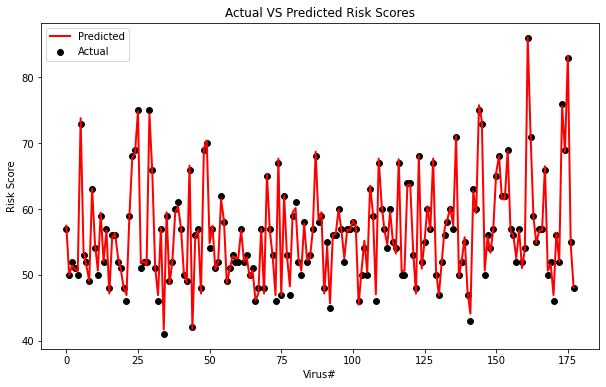

In [11]:
x = np.arange(0, len(resDF['Actual']))
Actual = plt.scatter(x, resDF['Actual'],  color='black', label="Actual", s=35)
Predicted = plt.plot(x, resDF['Predicted'], color='red', linewidth=2, label="Predicted")

plt.xlabel('Virus#')
plt.ylabel('Risk Score')
plt.title("Actual VS Predicted Risk Scores")

plt.legend(loc="upper left")
plt.show()

In [12]:
resDF['Deviation'].max()

1.244140625

<b>We can see that the largest deviation between the actual values to our model's predicted values is pretty small. 
  Let us use the R2 Score test to evaluate our model's accurecy:<b/>  

In [13]:
print('R2 Score: ' + str(r2_score(y_test, y_pred)))

R2 Score: 0.9957700572588674


<b>We have got a result very close to 1, meaning our model is very accurate and can give very a good prediction regarding new viruses risk scores which can help predictic the probability of a virus to be implicated in pandemic or epidemic/outbreak events in humans or animals.<b/> 

# Hope you enjoyed, stay safe :)